In [1]:
from collections import defaultdict
from typing import List

import matplotlib.pyplot as plt
import random 

from dice import TurnBasedPlayer,Game

In [2]:
num_players = 6
num_games = 10000
score_goal = 5000

In [3]:
## without function

In [4]:
wins = 0
player_avg_turns = []

for i in range(num_games):
    player_of_interest = TurnBasedPlayer(3)  ## magic number
    players = [TurnBasedPlayer(random.randint(1,10)) for _ in range(num_players-1)] 
    player_avg_turns.append(sum([player.turns for player in players])/len(players))
    players.append(player_of_interest)
    random.shuffle(players)
    game = Game(players,score_goal)
    game.play()
    
    if game.winner == player_of_interest:
        wins += 1
        
        
wins = wins / num_games
print(wins)
print(sum(player_avg_turns)/len(player_avg_turns))

0.3461
5.511879999999997


In [5]:
def turn_based_simulation(player_of_interest_turns:int,num_players:int=6,num_games:int=10000,score_goal:int=5000,max_player_turns:int=10)->float:
    wins = 0
    player_avg_turns = []

    for i in range(num_games):
        player_of_interest = TurnBasedPlayer(player_of_interest_turns)  
        players = [TurnBasedPlayer(random.randint(1,max_player_turns)) for _ in range(num_players-1)] 
        player_avg_turns.append(sum([player.turns for player in players])/len(players))
        players.append(player_of_interest)
        random.shuffle(players)
        game = Game(players,score_goal)
        game.play()

        if game.winner == player_of_interest:
            wins += 1


    return wins / num_games,sum(player_avg_turns)/len(player_avg_turns)

In [6]:
turn_based_simulation(3)

(0.3451, 5.5038600000000075)

In [7]:
def turn_based_simulations(turns_to_be_examined:List[int],num_players:int=6,num_games:int=10000,score_goal:int=5000,max_player_turns:int=10):
    wins = defaultdict(int)
    
    for turn in turns_to_be_examined:
        wins[turn] = turn_based_simulation(turn,num_players=num_players,num_games=num_games,score_goal=score_goal,max_player_turns=max_player_turns)
        
    
    return wins
    

In [10]:
wins = turn_based_simulations([turn for turn in range(1,10)],num_games=10000,max_player_turns=20)
wins

defaultdict(int,
            {1: (0.1936, 10.485880000000012),
             2: (0.4733, 10.51311999999998),
             3: (0.5494, 10.481099999999957),
             4: (0.5164, 10.512280000000048),
             5: (0.4405, 10.498),
             6: (0.3507, 10.49500000000006),
             7: (0.2566, 10.477959999999982),
             8: (0.1852, 10.497659999999989),
             9: (0.125, 10.466300000000007)})

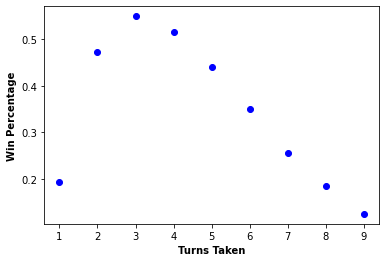

In [13]:
plt.scatter(x=wins.keys(),y=[value[0] for value in wins.values()],color='blue')
plt.xlabel('Turns Taken',fontweight='bold')
plt.ylabel('Win Percentage',fontweight='bold')
plt.show()

In [14]:
import csv 
with open('turnbasedresults.csv',mode='w',newline='') as file:
    wr = csv.writer(file,delimiter = ',')
    wr.writerow(['TurnsTaken','WinPercentage'])
    for key, value in wins.items():
        wr.writerow([key,value[0]])